# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [15]:
# Choisir une année
year = 1874

In [17]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1874_Tome_I1_Part_1.txt',
 'Bxl_1874_Tome_I1_Part_2.txt',
 'Bxl_1874_Tome_I1_Part_3.txt',
 'Bxl_1874_Tome_I1_Part_4.txt',
 'Bxl_1874_Tome_I1_Part_5.txt',
 'Lkn_1874_Tome_RptAn_Part_8.txt']

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

13

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE\n\nD E\n\nBULLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nA N N É E\n\n1880.\n\nPREMIÈRE PARTIE.\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBBUXELLES,\n\nIMPRIMERIE DE V JULIEN BAERTSOEN,\nGrand\'Place, 5.\ne\n\n\x0c]\n\nI\n\n£\n\ni\n\n!\n\n\x0cN " 1.\n\n'

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE\n\nD E\n\nBULLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nA N N É E\n\n1880.\n\nPREMIÈRE PARTIE.\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBBUXELLES,\n\nIMPRIMERIE DE V JULIEN BAERTSOEN,\nGrand\'Place, 5.\ne\n\n\x0c]\n\nI\n\n£\n\ni\n\n!\n\n\x0cN " 1.\n\nCOMPTE RENDU DE LA SÉANCE DÛ 1 2 JANVIER 1 8 8 0 .\n\nVILLE\n\nDE\n\nBRUXELLES.\n\nBULLETIN\n\nC O M M U N A L\n\nANNÉE\n\nC O N S E I L\n\n1880.\n\nC O M M U N A L .\n\nSéance du 42 Janvier 1880.\nPrésidence de M . F . VANDERSTRAETEN, Bourgmestre.\n\nSOMMAIRE :\n\nCommunications.\nHospices. — Locations. — Approbation.\n»\nId.'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1880_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin bruxelles communal première partie compte rendu séances bbuxelles imprimerie julien baertsoen grand place compte rendu séance janvier bruxelles bulletin année séance janvier présidence vanderstraeten bourgmestre sommaire communications hospices locations approbation avis favorable vente arbres remboursement capital commune westerloo eglise sainte sudule reddition comptes ancien trésorier pris notification eglise bon secours radiation inscription hypothécaire avis favorable communauté is'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('conseil', 1353), ('francs', 1237), ('collège', 950), ('echevin', 849), ('bourgmestre', 834), ('art', 810), ('section', 782), ('rapport', 695), ('question', 661), ('bruxelles', 647)]


### Créer, stocker et afficher le nuage de mots

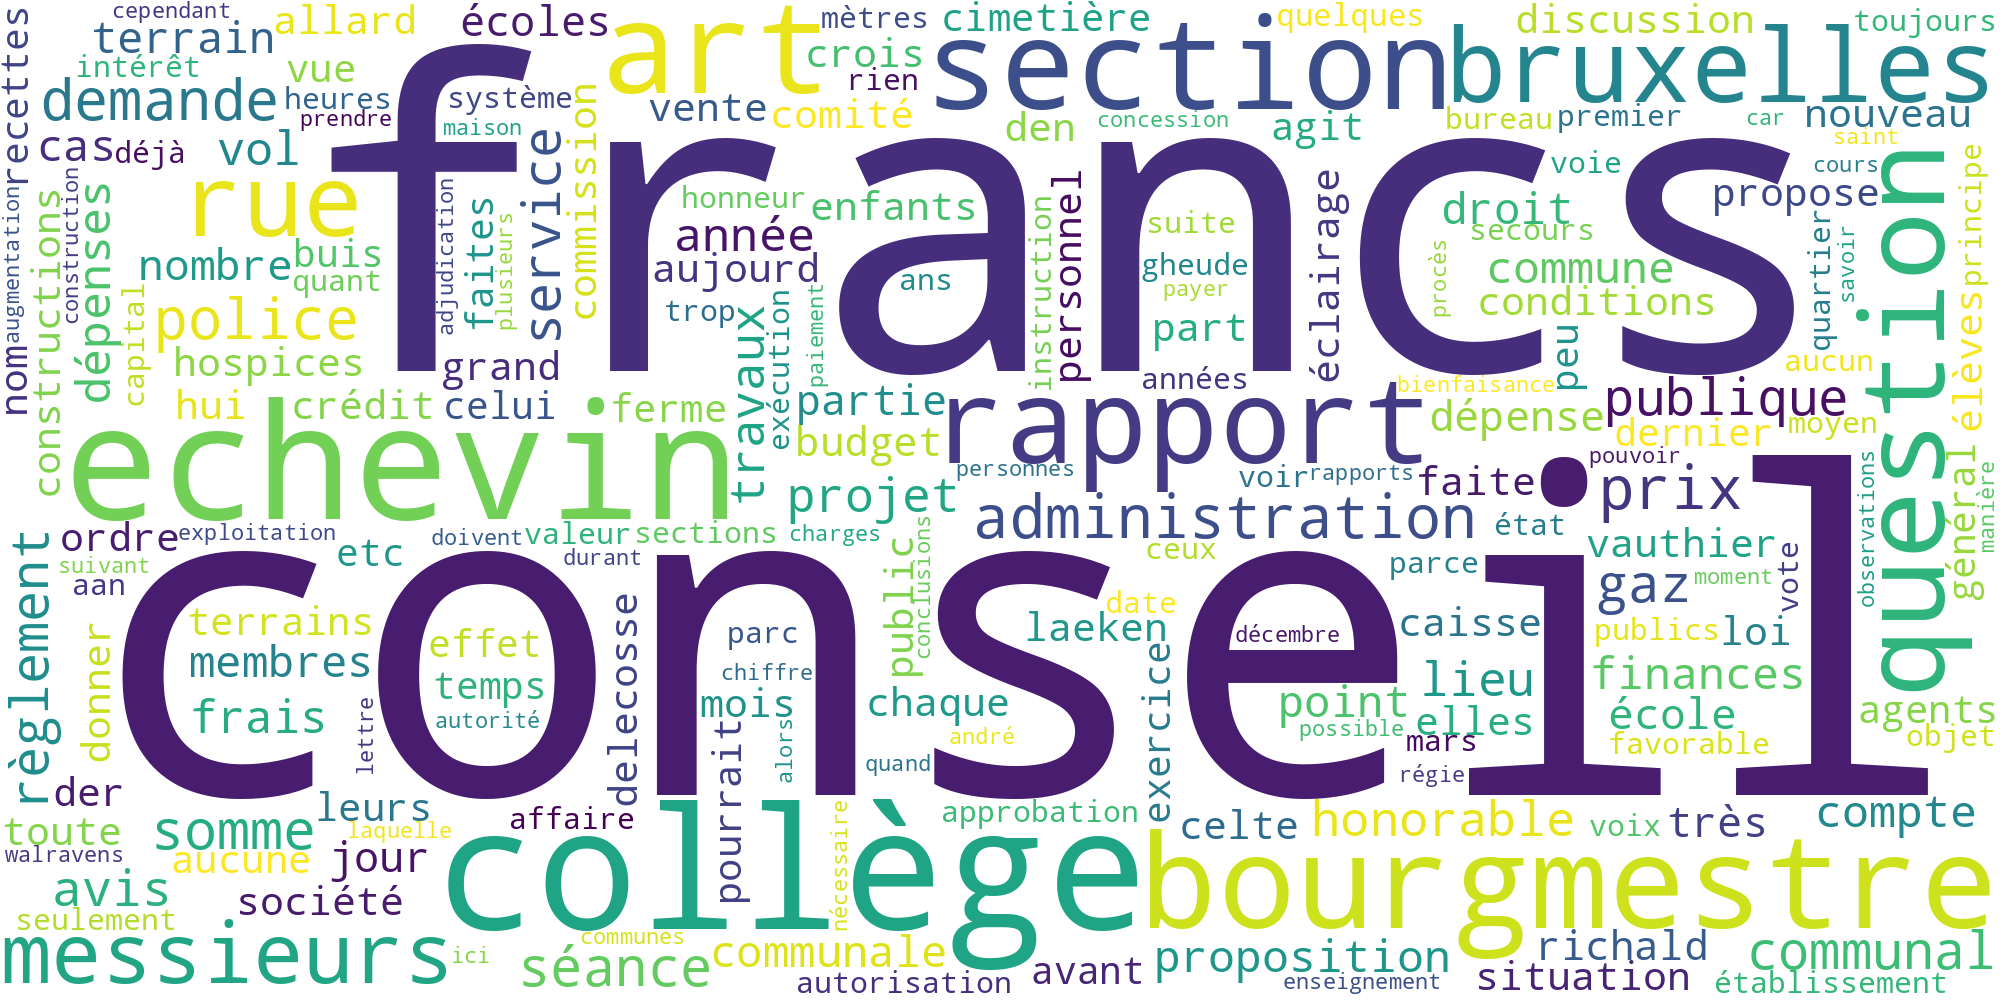

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))